# Mesh2d refine based on gridded samples with strided arrays

In [1]:
import matplotlib.pyplot as plt
plt.close('all')
import numpy as np
from meshkernel import MeshKernel, ProjectionType, MakeGridParameters, GriddedSamples, MeshRefinementParameters, RefinementType
import xarray as xr

### Import sampled bathymetry generating non contiguous arrays

In [2]:
lon_min, lon_max, lat_min, lat_max = 142, 150, -42, -39
dxy = 0.5

file_nc_bathy = r'p:\metocean-data\open\GEBCO\2021\GEBCO_2021.nc'
data_bathy = xr.open_dataset(file_nc_bathy)
data_bathy_sel = data_bathy.sel(lon=slice(lon_min,lon_max,10),lat=slice(lat_min,lat_max,10)).elevation

### Generate rectangular mesh

In [3]:
# create base grid
make_grid_parameters = MakeGridParameters(angle=0,
                                          origin_x=lon_min,
                                          origin_y=lat_min,
                                          upper_right_x=lon_max,
                                          upper_right_y=lat_max,
                                          block_size_x=dxy,
                                          block_size_y=dxy)

mk = MeshKernel(projection=ProjectionType(1))
mk.curvilinear_compute_rectangular_grid_on_extension(make_grid_parameters)
mk.curvilinear_convert_to_mesh2d()

### Refine the mesh

In [4]:
lon_np = data_bathy_sel.lon.to_numpy()
lat_np = data_bathy_sel.lat.to_numpy()
values_np = data_bathy_sel.to_numpy().flatten().astype(np.float32)
gridded_samples = GriddedSamples(x_coordinates=lon_np,y_coordinates=lat_np,values=values_np)

#refinement
mesh_refinement_parameters = MeshRefinementParameters(min_edge_size=1000, refinement_type= RefinementType.WAVE_COURANT)

mk.mesh2d_refine_based_on_gridded_samples(gridded_samples=gridded_samples,
                                           mesh_refinement_params=mesh_refinement_parameters)

### Plot the refined mesh

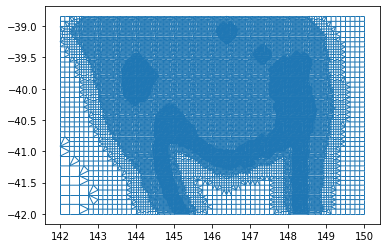

In [5]:
fig, ax = plt.subplots()
mk.mesh2d_get().plot_edges(ax=ax,linewidth=1)